# Review
Hi, my name is Dmitry and I will be reviewing your project.

You can find my comments in colored markdown cells:

<div class="alert alert-success">
    If everything is done succesfully.
</div>

<div class="alert alert-warning">
    If I have some (optional) suggestions, or questions to think about, or general comments.
</div>

<div class="alert alert-danger">
    If a section requires some corrections. Work can't be accepted with red comments.
</div>

Please don't remove my comments, as it will make further review iterations much harder for me.

Feel free to reply to my comments or ask questions using the following template:

<div class="alert alert-info">
    For your comments and questions.
</div>

First of all, thank you for turning in the project! You did a pretty good job! The project is accepted. Good luck on the next sprint!

# Analyzing Data on Cab companies in Chicago

We have 3 datasets to work with. The first one contains the company names and the number of trips made by cabs owned by those companies. The second contains the names of dropoff locations (neighborhoods) and the average number of trips to those neighborhoods. The first and second will be used for the main analysis. The third dataset contains dates and times, weather conditions, and durations of trips from the Loop neighborhood to the O'Hare International Airport on Saturdays. This dataset will be used for hypothesis testing

## Table of Contents

1. [Step 1. Open the First two datasets](#step1)
2. [Step 2. Exploratory Data Analysis](#step2)
    1. [The Top 10 dropoff locations](#step2_1)
    2. [Ranking Cab companies by number of trips](#step2_2)
3. [Step 3. Hypothesis Testing: 'The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays](#step3)
4. [Conclusion](#conclusion)

## Step 1. Open the First two datasets <a name="step1"></a>

Let us import the necessary python libraries

In [1]:
from scipy import stats as st #for probability and statistics calculations
import pandas as pd #for dataframe manipulation
import matplotlib.pyplot as plt #for graph plotting and display
import numpy as np #for advanced mathematical operations

Now we can read the datasets we are given. Let us read he first dataset

In [2]:
company_data = pd.read_csv('/datasets/project_sql_result_01.csv') 
#reads the csv file and converts it into a dataframe called company_data
company_data.head() #first 5 rows of our company_data dataframe

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [3]:
company_data.info() #general information about the company_data dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


We observe no missing values, and the column shave the right data types. Now, let us move to the second dataset

In [4]:
dropoff_data = pd.read_csv('/datasets/project_sql_result_04.csv') 
#reads the csv file and converts it into a dataframe called dropoff_data
dropoff_data.head() #first 5 rows of our dropoff_data dataframe

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [5]:
dropoff_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


The only issue here is the average_trips column having the float type. We need to round the values and change the type to integer.

In [6]:
dropoff_data['average_trips'] = dropoff_data['average_trips'].round()
#rounds the values in the average_trips column

dropoff_data['average_trips'] = dropoff_data['average_trips'].astype('int')
#changes the data type of the average_trips column to integer

dropoff_data.head()#first 5 rows of dropoff_data

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547


<div class="alert alert-success">
    Alright, you loaded data and had a look at it!
</div>

## Step 2. Exploratory Data Analysis <a name="step2"></a>

### The Top 10 dropoff locations <a name="step2_1"></a>

We can get this by sorting the dropoff_data table by descending order of the average_trips column

In [7]:
top10 = dropoff_data.sort_values(by='average_trips', ascending=False).head(10)
#sorts the values of dropoff_data by descending order of the average_trips values and takes the 
#first ten rows
top10

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1260


Let us put that on a bar chart

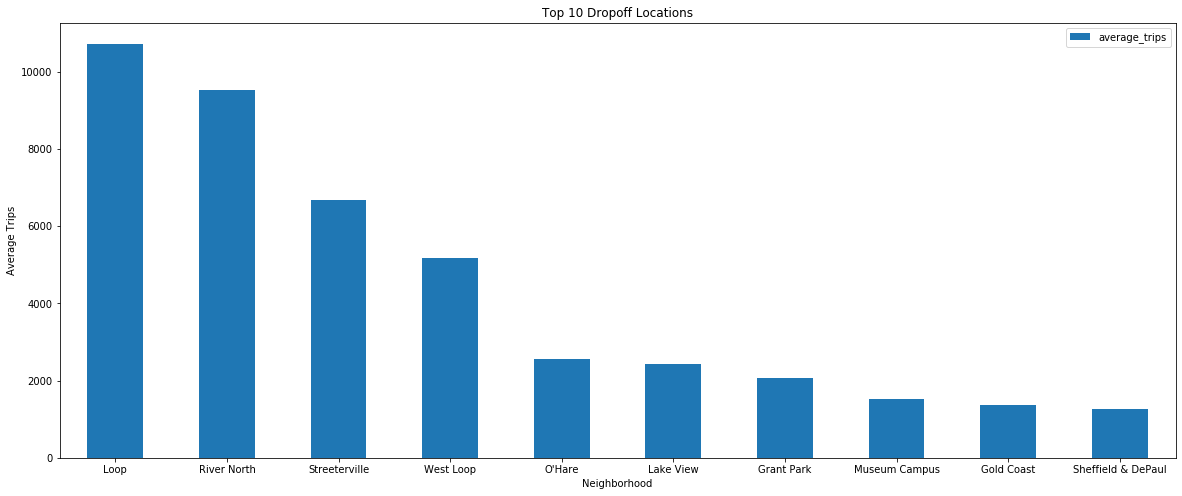

In [8]:
top10.plot.bar(x='dropoff_location_name', y='average_trips', rot=0, figsize=(20, 8))
#plots a bar chart with the neighborhoods on the x-axis and the average trips on the y-axis having a size of
#20 by 8 inches
plt.title('Top 10 Dropoff Locations')#titles the chart: Top 10 Dropoff Locations
plt.xlabel('Neighborhood')#labels the x-axis: Neighborhood
plt.ylabel('Average Trips')#labels the y-axis: Average Trips
plt.show()#shows the plotted chart

The most popular destinations are Looop, River North, Streeterville, and West Loop neighborhoods in that order. The least popular of the lot is Sheffield & DePaul. There is a significant difference between the top four and the rest; the fourth most popular (West Loop) has about double the amount of visits as O'Hare (the 5th most popular) 

<div class="alert alert-success">
    You successfully found the top dropoff locations. The bar chart looks great!
</div>


### Ranking Cab companies by number of trips <a name="step2_2"></a>

We can plot a bar chart showing this data from the company_data table. Given that there are 64 of them, we can make the bar chart horizontal by using 'plot.barh' instead of 'plot.bar'. Let us verify the range of  values in the trips_amount coulmn by getting a numerical description of the column.

In [9]:
company_data['trips_amount'].describe()#numerical description of average_trips column

count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

The minimum value in trips_amount is just 2 trips. We need to filter out the companies whose numbers are not very significant. We can set a threshold of 500. So we can create a slice from our company_data table for rows where the value in the trips_amount column is greater or equal to 500 (company_data.query('trips_amount >= 500')) and plot the horizontal bar chart for those values

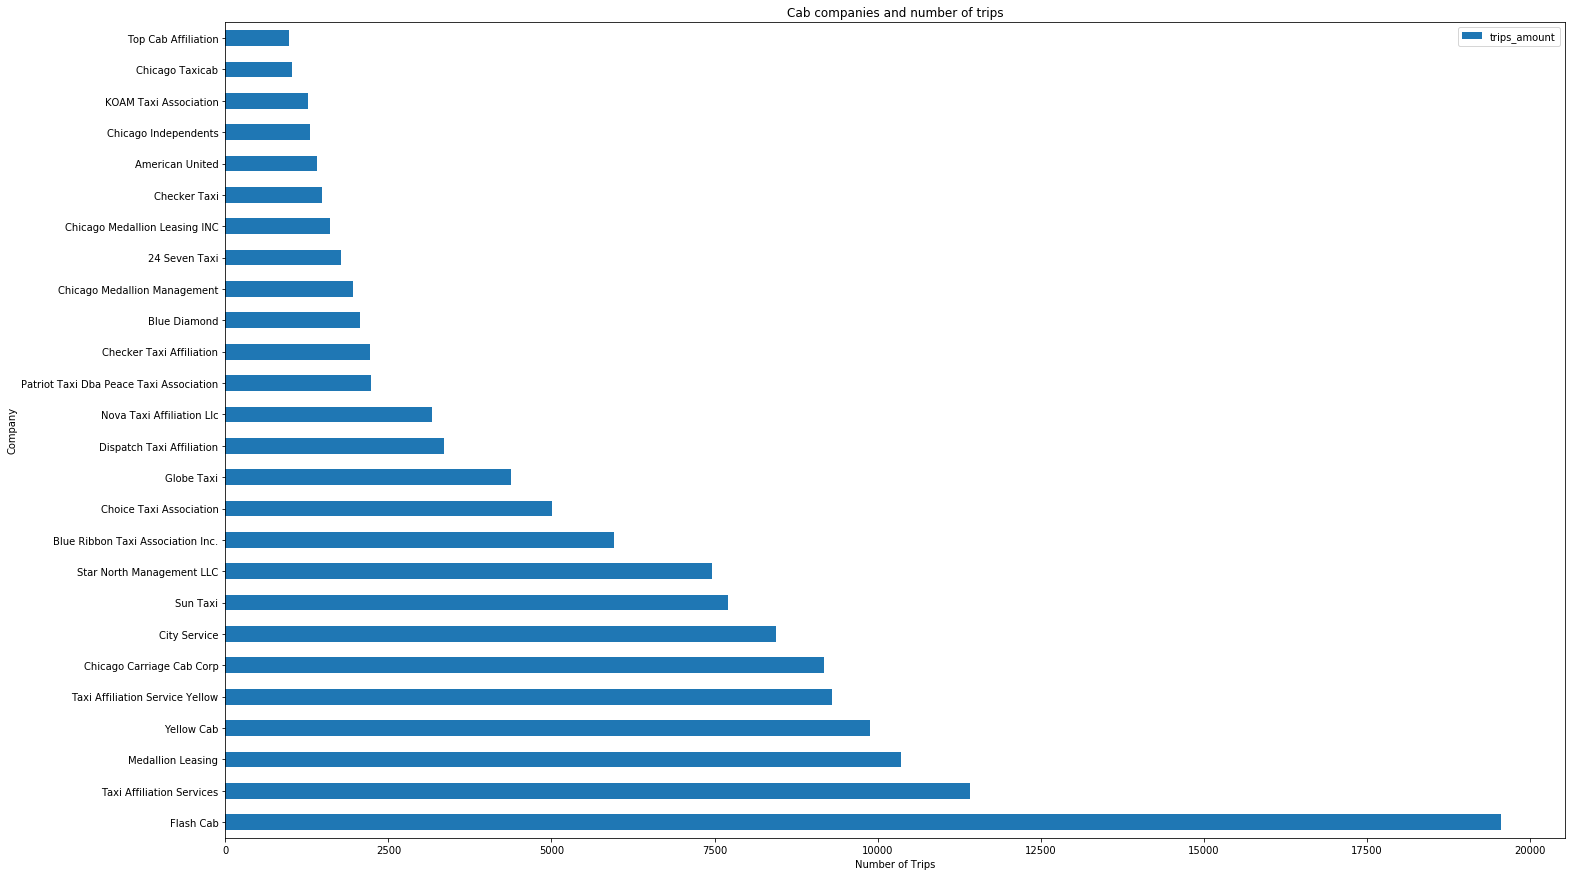

In [10]:
company_data.query('trips_amount >= 500').plot.barh(x='company_name', y='trips_amount', rot=0, figsize=(24, 15))
plt.title('Cab companies and number of trips')
plt.xlabel('Number of Trips')
plt.ylabel('Company')
plt.show()

Flash Cab is clearly at the top, by a lot. They probably own more cabs on the road. Second is Taxi Affilliation Services. After filtering with a threshold of 500, there are only 26 companies in our chart. That means 38 companies had fewer than 500 trips, so most of the market share is held by a smaller number of companies 

<div class="alert alert-warning">
    Good job, although I would make the figure slightly bigger still, so that the text would be more readable.
</div>


## Step 3. Hypothesis Testing: 'The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays' <a name="step3"></a>

First, we need to read our third dataset

In [11]:
loop_ohare = pd.read_csv('/datasets/project_sql_result_07.csv') 
#reads the csv file and converts it into a dataframe called loop_ohare
loop_ohare.head() #first 5 rows of our loop_ohare dataframe

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [12]:
loop_ohare.info()#general information of loop_ohare

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Our only issue is to change the data type of the start_ts column to date-time. Using the 'pd.to_datetime' method, the format argument will be '%Y%m%d %H%M%S' so as to reflect the existing format in the column 

In [15]:
loop_ohare['start_ts']=pd.to_datetime(loop_ohare['start_ts'], format='%Y-%m-%d %H:%M:%S')
#changes the format of the start_ts column to date-time following the existing format
loop_ohare.info()#general info about loop_ohare

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null datetime64[ns]
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


Now let us make our two slices: one where the value of the weather_conditions column is "Good", and another where the value is "Bad"

In [16]:
good_weather = loop_ohare.query('weather_conditions == "Good"')
#creates slice from loop_ohare where the weather condition is "Good" 
good_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 1066
Data columns (total 3 columns):
start_ts              888 non-null datetime64[ns]
weather_conditions    888 non-null object
duration_seconds      888 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.8+ KB


In [17]:
bad_weather = loop_ohare.query('weather_conditions == "Bad"')
##creates slice from loop_ohare where the weather condition is "Bad" 
bad_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 6 to 1067
Data columns (total 3 columns):
start_ts              180 non-null datetime64[ns]
weather_conditions    180 non-null object
duration_seconds      180 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.6+ KB


Our Null Hypothesis will be: 'The average duration of rides from the Loop to O'Hare International Airport is the same on rainy Saturdays'. Therefore, our Alternate Hypothesis will be: 'The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays'. Before testing the hypothesis, we need to test whether the variances can be considered to be homogeneous. To do so, we will implement Levene's test using the method st.levene() which will take our user_score columns from both slices as arguments, and also set the parameter "center='mean'". This method returns a p-value that we will compare to a threshold called the statistical significance (commonly called alpha). We will set alpha to 5%. If the p-value returned is greater than our alpha, then the variances can be considered homogeneous. If it is lower than our alpha, then the variances can't be considered homogeneous 

In [18]:
alpha = 0.05 #sets our alpha to 5%
result = st.levene(good_weather['duration_seconds'], bad_weather['duration_seconds'], center='mean')
#implements Levene's test on our slice columns specifying that the variances were calculated from the mean
print('p-value:', result.pvalue)#prints the p-value
if result.pvalue > alpha:#if the p-value is greater than alpha
    print('The variances are approximately the same')#The variances are approx. the same
else:#i.e if the p-value is less than alpha
    print('The variances are too far apart to be considered homogeneous')
    #The variances can't be considered homogeneous

p-value: 0.3968505113995001
The variances are approximately the same


The p-value is greater than our alpha so we can consider the variances to be the same for our hypothesis test. To test our hypothesis, we will use the st.ttest_ind() method which tests for likelihood of the averages (means) of 2 statistical populations (in this case, both of our slice columns) being equal. It takes both slice columns as arguments, and we will set the parameter 'equal_var=True' since we concluded from Levene's test that the variances can be considered homogeneous. It also returns a p-value that we will compare to our alpha. If the p-value is greater than our alpha, it means that the averages are likely to be the same in which case, we can't reject our null hypothesis. Otherwise, we can reject the null hypothesis.

In [19]:
alpha = 0.05 #sets our alpha to 5%
result = st.ttest_ind(good_weather['duration_seconds'], bad_weather['duration_seconds'], equal_var=True)
#implements the t-test on our slice columns specifying that our variances are homogeneous
print('p-value:', result.pvalue)#prints the p-value
if result.pvalue > alpha:#if the p-value is greater than alpha
    print('We cannot reject the null hypothesis')
    #the means are likely to be equal, so we can't reject the null hypothesis
else:#i.e if the p-value is less than alpha
    print('We reject the null hypothesis')
    #the means are not likely to be equal, so we can reject the null hypothesis

p-value: 6.517970327099473e-12
We reject the null hypothesis


The p-value was less than our alpha, therefore we reject our Null hypothesis upholding the statement that: "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays." 

<div class="alert alert-success">
    The tests were conducted correctly with approrpiate null and alternative hypotheses and proper procedure.
</div>


## Conclusion <a name="conclusion"></a>

We ranked the top 10 neighborhoods, with the Loop neighborhood being at the top. We also ranked cab companies and observed the absolute domination of Flash Cab. We also tested and upheld the hypothesis that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

<div class="alert alert-warning">
    It would be nice to make the overall conclusion more like a summary of the most interesting results than just an overview of what you did
</div>
